In [1]:
'''
Create plots for
1. Estabs creation and destruction rate
2. Jobs creation and destruction rate
3. Jobs reallocation rate
4. Firms creation and destruction rate
'''

'\nCreate plots for\n1. Estabs creation and destruction rate\n2. Jobs creation and destruction rate\n3. Jobs reallocation rate\n4. Firms creation and destruction rate\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
data_path = "/Users/danielseymour/Developer/EC334-Summative/processed_data/two_digit_NAICS_bds_tfp.csv"
merged = pd.read_csv(data_path)

In [4]:
merged.head(20)

,year,NAICS,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp,Industry,Basis,weight,tfp_pct_change,tfp_index_2017,firms_percent_destroyed
0,1987,11,18421,18977,170858,170501,3109,16.513,2811,14.930,...,54.075,2058,2060,11605,"Agriculture, forestry, fishing, and hunting",All workers,0.009333,N.A.,68.776,11.172032
1,1987,21,21621,27222,578807,632507,3291,11.498,6090,21.278,...,30.951,4029,4064,31974,Mining,All workers,0.006984,N.A.,66.059,18.634661
2,1987,22,5844,12393,774290,772758,654,5.294,575,4.655,...,11.146,313,315,1606,Utilities,All workers,0.013570,N.A.,76.927,5.355921
3,1987,23,485658,492062,4965017,4877830,90479,18.838,66956,13.940,...,50.605,49892,49934,282447,Construction,All workers,0.030664,N.A.,116.637,10.273073
4,1987,31-33,286017,332737,16522435,16658447,35126,10.577,33854,10.194,...,22.779,23996,24227,300581,Manufacturing sector,All workers,0.101077,N.A.,76.544,8.389711
5,1987,42,279786,357272,4671838,4637353,43355,12.146,42714,11.966,...,35.023,26632,27290,159386,Wholesale trade,All workers,0.021017,N.A.,68.663,9.518704
6,1987,44-45,729897,1059955,11923546,11732794,136344,12.912,128328,12.153,...,32.585,82526,85578,409953,NaN,NaN,NaN,NaN,NaN,11.306527
7,1987,48-49,103252,128677,2852556,2799704,22360,17.603,19056,15.002,...,33.731,13083,13241,90227,Transportation and warehousing,All workers,0.014584,N.A.,77.400,12.670941
8,1987,51,46228,76072,2539117,2542860,12180,16.119,11158,14.767,...,40.207,6926,7103,70255,Information,All workers,0.016606,N.A.,78.021,14.982262
9,1987,52,173890,289319,5493500,5369892,34083,11.950,25878,9.073,...,26.342,15843,16202,100021,Finance and insurance,All workers,0.025597,N.A.,99.457,9.110932


In [5]:
merged.columns

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp', 'Industry',
       'Basis', 'weight', 'tfp_pct_change', 'tfp_index_2017',
       'firms_percent_destroyed'],
      dtype='object')

In [6]:
# ── 1) Define the rate columns you want to smooth
vars = [
    'job_creation_rate',
    'job_destruction_rate',
    'reallocation_rate', 
    'estabs_entry_rate', 
    'estabs_exit_rate', 
    'firms_percent_destroyed'
]

# ── 2) Compute 3-year centered moving averages within each sector
for var in vars:
    merged[f'{var}_3yr_avg'] = (
        merged
          .sort_values(['NAICS','year'])
          .groupby('NAICS')[var]
          .rolling(window=3, min_periods=1, center=True)
          .mean()
          .reset_index(level=0, drop=True)
    )

In [7]:
merged.head()

,year,NAICS,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,weight,tfp_pct_change,tfp_index_2017,firms_percent_destroyed,job_creation_rate_3yr_avg,job_destruction_rate_3yr_avg,reallocation_rate_3yr_avg,estabs_entry_rate_3yr_avg,estabs_exit_rate_3yr_avg,firms_percent_destroyed_3yr_avg
0,1987,11,18421,18977,170858,170501,3109,16.513,2811,14.930,...,0.009333,N.A.,68.776,11.172032,28.3625,25.6770,51.3545,16.4680,15.0490,11.082631
1,1987,21,21621,27222,578807,632507,3291,11.498,6090,21.278,...,0.006984,N.A.,66.059,18.634661,18.1050,27.0160,36.2100,12.1265,18.3605,15.542618
2,1987,22,5844,12393,774290,772758,654,5.294,575,4.655,...,0.013570,N.A.,76.927,5.355921,6.1645,6.1740,11.9700,6.4205,5.1495,4.688551
3,1987,23,485658,492062,4965017,4877830,90479,18.838,66956,13.940,...,0.030664,N.A.,116.637,10.273073,27.6435,25.0115,50.0230,17.8460,14.3970,10.778341
4,1987,31-33,286017,332737,16522435,16658447,35126,10.577,33854,10.194,...,0.101077,N.A.,76.544,8.389711,12.4600,12.2140,22.7645,10.6765,9.7580,8.196048


In [8]:
# ── 3) Build an all-sector annual series of the smoothed net_job_creation_rate
df_plot = (
    merged
      .groupby('year')[ 'job_creation_rate_3yr_avg' ]
      .mean()
      .reset_index()
)

In [9]:
df_plot.head(5)

,year,job_creation_rate_3yr_avg
0,1987,20.037737
1,1988,19.701193
2,1989,19.040123
3,1990,17.913351
4,1991,17.351877


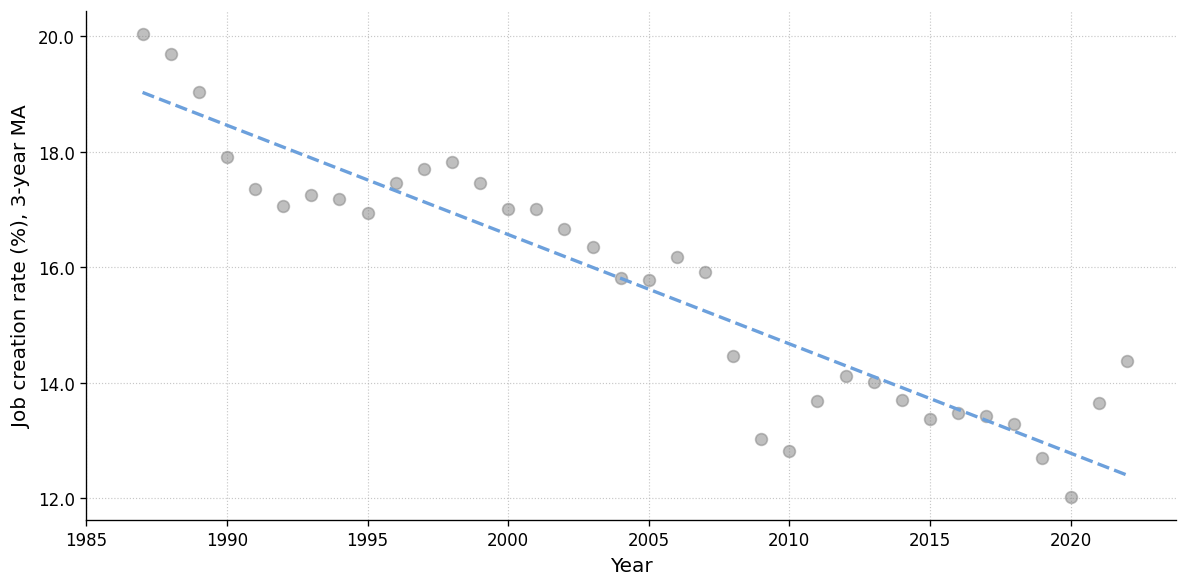

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1) Fit the linear trend
X = df_plot[['year']].values
y = df_plot['job_creation_rate_3yr_avg'].values
model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

# 2) Start the figure
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

# 3) Plot only the grey dots (no connecting lines)
ax.scatter(
    df_plot['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

# 4) Plot the trend line in a light blue (no markers)
ax.plot(
    df_plot['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#6CA0DC',
)

# 5) Ticks
ax.set_xticks(range(1985, df_plot['year'].max()+1, 5))
ax.set_yticks([12.0, 14.0, 16.0, 18.0, 20.0])
ax.yaxis.set_major_formatter('{x:.1f}')  # show one decimal place

# 6) Spine cleanup
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 7) Gridlines (behind data)
ax.grid(which='major', linestyle=':', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

# 8) Labels only on the axes (no title, no legend)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Job creation rate (%), 3-year MA', fontsize=12)

plt.tight_layout()
plt.show()

plt.savefig('../figures/job_destruction_rate_trend.png', dpi=300, bbox_inches='tight')

In [45]:
# ── 3) Build an all-sector annual series of the smoothed net_job_creation_rate
df_plot = (
    merged
      .groupby('year')[ 'job_destruction_rate_3yr_avg' ]
      .mean()
      .reset_index()
)

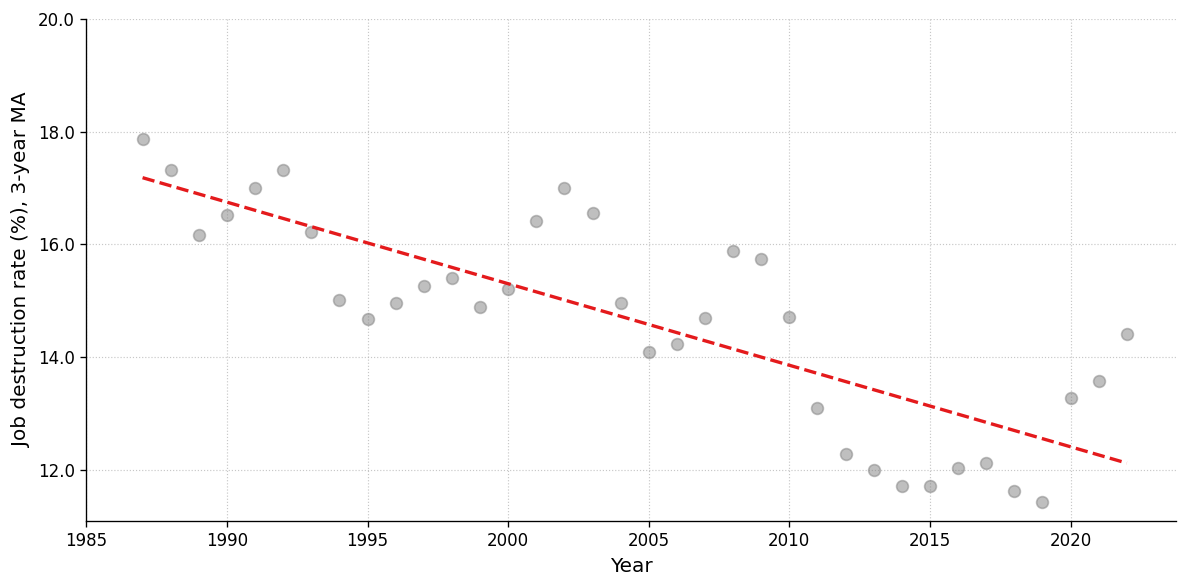

In [46]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1) Fit the linear trend
X = df_plot[['year']].values
y = df_plot['job_destruction_rate_3yr_avg'].values
model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

# 2) Start the figure
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

# 3) Plot only the grey dots (no connecting lines)
ax.scatter(
    df_plot['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

# 4) Plot the trend line in a light blue (no markers)
ax.plot(
    df_plot['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#E41A1C')

# 5) Ticks
ax.set_xticks(range(1985, df_plot['year'].max()+1, 5))
ax.set_yticks([12.0, 14.0, 16.0, 18.0, 20.0])
ax.yaxis.set_major_formatter('{x:.1f}')  # show one decimal place

# 6) Spine cleanup
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 7) Gridlines (behind data)
ax.grid(which='major', linestyle=':', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

# 8) Labels only on the axes (no title, no legend)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Job destruction rate (%), 3-year MA', fontsize=12)

plt.tight_layout()
plt.show()

In [47]:
# ── 3) Build an all-sector annual series of the smoothed net_job_creation_rate
df_plot = (
    merged
      .groupby('year')[ 'reallocation_rate_3yr_avg' ]
      .mean()
      .reset_index()
)

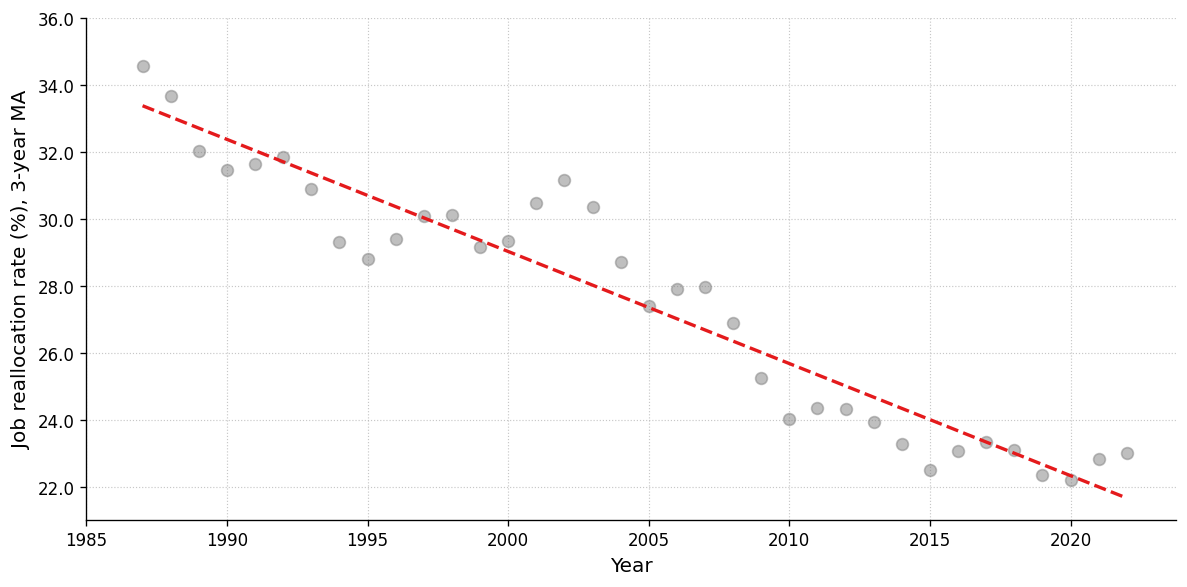

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 1) Fit the linear trend
X = df_plot[['year']].values
y = df_plot['reallocation_rate_3yr_avg'].values
model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

# 2) Start the figure
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

# 3) Plot only the grey dots (no connecting lines)
ax.scatter(
    df_plot['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

# 4) Plot the trend line in red (no markers)
ax.plot(
    df_plot['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#E41A1C')

# 5) Dynamic y-ticks based on actual data range
y_min = np.floor(y.min())
y_max = np.ceil(y.max())
y_range = y_max - y_min
 
# Determine appropriate tick spacing based on range
if y_range <= 5:
    tick_spacing = 0.5  # For small ranges
elif y_range <= 10:
    tick_spacing = 1.0  # For medium ranges
else:
    tick_spacing = 2.0  # For large ranges

# Create dynamic ticks spanning from data minimum to maximum
y_ticks = np.arange(y_min, y_max + tick_spacing, tick_spacing)
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')  # show one decimal place

# Keep x-ticks as before
ax.set_xticks(range(1985, df_plot['year'].max()+1, 5))

# 6) Spine cleanup
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 7) Gridlines (behind data)
ax.grid(which='major', linestyle=':', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

# 8) Labels only on the axes (no title, no legend)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Job reallocation rate (%), 3-year MA', fontsize=12)

plt.tight_layout()
plt.show()

In [49]:
print(merged.columns)

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp', 'Industry',
       'Basis', 'weight', 'tfp_pct_change', 'tfp_index_2017',
       'firms_percent_destroyed', 'job_creation_rate_3yr_avg',
       'job_destruction_rate_3yr_avg', 'reallocation_rate_3yr_avg',
       'estabs_entry_rate_3yr_avg', 'estabs_exit_rate_3yr_avg',
       'firms_percent_destroyed_3yr_avg'],
      dtype='object')


In [50]:
# 2) DataFrame for firm deaths
df_plot = (
    merged
    .groupby('year')
    .agg({
        'estabs_exit_rate_3yr_avg': 'mean'  # or the appropriate column name for firm death rate
    })
    .reset_index()
)

In [51]:
df_plot.head(5)

,year,estabs_exit_rate_3yr_avg
0,1987,12.374132
1,1988,12.097070
2,1989,11.548912
3,1990,11.434561
4,1991,11.398456


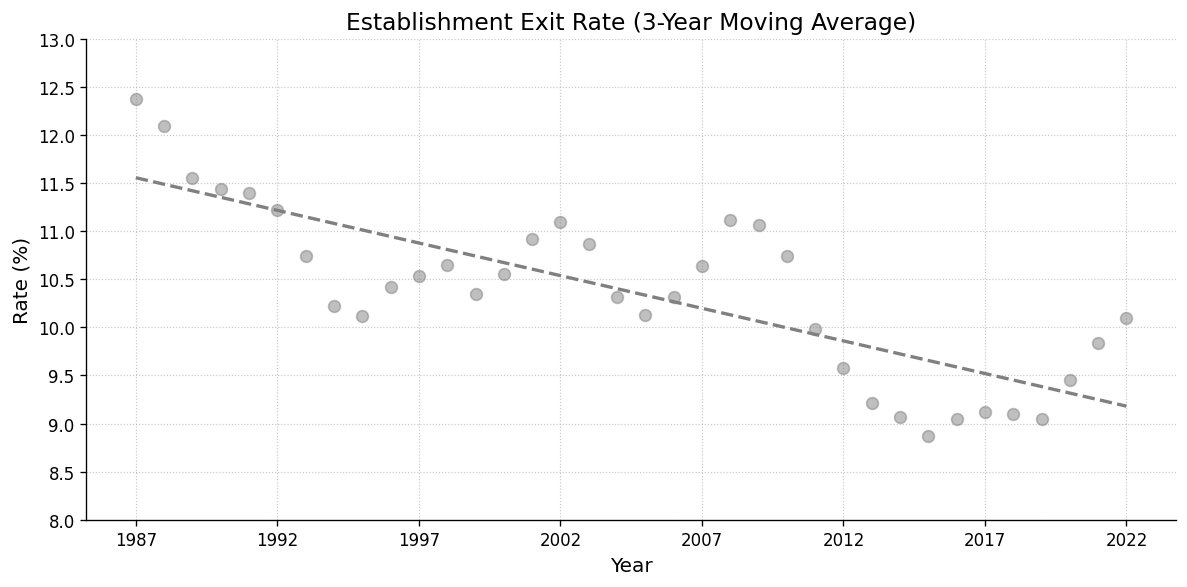

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Start the figure
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)

# Get x-axis data
X = df_plot[['year']].values
years = df_plot['year']

# Plot establishment exit rate data points
ax.scatter(
    years,
    df_plot['estabs_exit_rate_3yr_avg'],
    s=50,
    color='grey',
    alpha=0.5
)

# Fit and plot trend line
y_estab = df_plot['estabs_exit_rate_3yr_avg'].values
model_estab = LinearRegression().fit(X, y_estab)
y_estab_trend = model_estab.predict(X)

ax.plot(
    years,
    y_estab_trend,
    linestyle='--',
    linewidth=2,
    color='grey'
)

# Customize plot
ax.set_facecolor('white')
ax.set_title('Establishment Exit Rate (3-Year Moving Average)', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Rate (%)', fontsize=12)

# Dynamic y-ticks
y_min = np.floor(y_estab.min())
y_max = np.ceil(y_estab.max())
y_range = y_max - y_min
tick_spacing = 0.5 if y_range <= 5 else (1.0 if y_range <= 10 else 2.0)
ax.set_yticks(np.arange(y_min, y_max + tick_spacing, tick_spacing))
ax.yaxis.set_major_formatter('{x:.1f}')

# Set x-ticks
min_year = min(years)
max_year = max(years)
ax.set_xticks(range(min_year, max_year+1, 5))

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add gridlines
ax.grid(which='major', linestyle=':', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

# Show plot
plt.tight_layout()
plt.show()

In [53]:
# 2) DataFrame for firm deaths
df_plot = (
    merged
    .groupby('year')
    .agg({
        'firms_percent_destroyed_3yr_avg': 'mean'  # or the appropriate column name for firm death rate
    })
    .reset_index()
)

In [54]:
df_plot.head(5)

,year,firms_percent_destroyed_3yr_avg
0,1987,10.063439
1,1988,9.888558
2,1989,9.522624
3,1990,9.628505
4,1991,9.483870


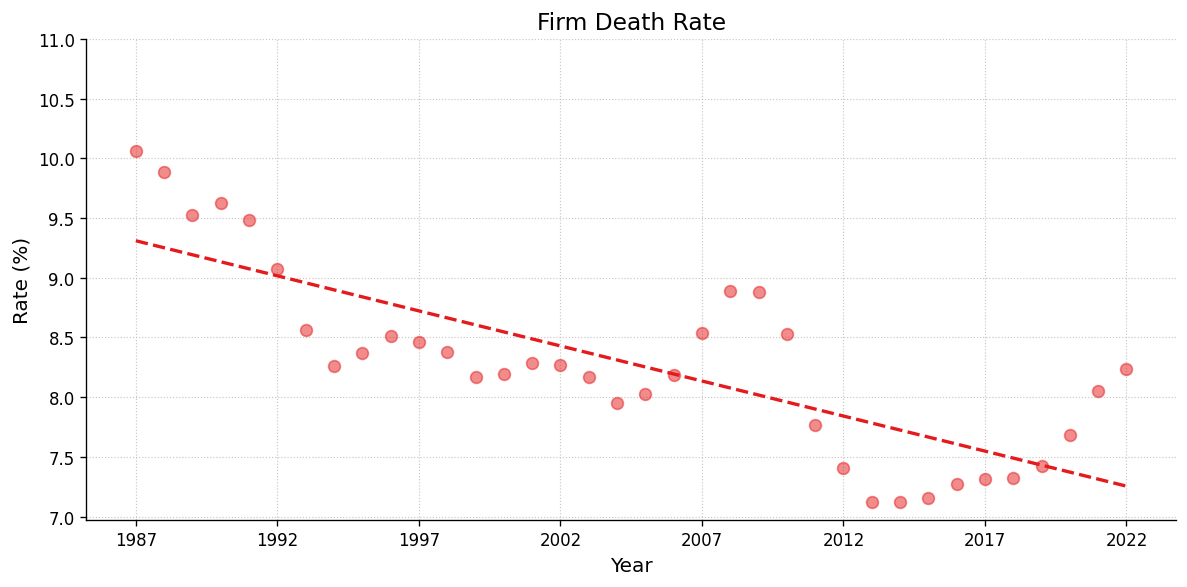

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Start the figure
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)

# Get x-axis data
X = df_plot[['year']].values
years = df_plot['year']

# Plot firm death rate data points
ax.scatter(
    years,
    df_plot['firms_percent_destroyed_3yr_avg'],
    s=50,
    color='#E41A1C',
    alpha=0.5
)

# Fit and plot trend line
y_firm = df_plot['firms_percent_destroyed_3yr_avg'].values
model_firm = LinearRegression().fit(X, y_firm)
y_firm_trend = model_firm.predict(X)

ax.plot(
    years,
    y_firm_trend,
    linestyle='--',
    linewidth=2,
    color='#E41A1C'
)

# Customize plot
ax.set_facecolor('white')
ax.set_title('Firm Death Rate', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Rate (%)', fontsize=12)

# Dynamic y-ticks
y_min = np.floor(y_firm.min())
y_max = np.ceil(y_firm.max())
y_range = y_max - y_min
tick_spacing = 0.5 if y_range <= 5 else (1.0 if y_range <= 10 else 2.0)
ax.set_yticks(np.arange(y_min, y_max + tick_spacing, tick_spacing))
ax.yaxis.set_major_formatter('{x:.1f}')

# Set x-ticks
min_year = min(years)
max_year = max(years)
ax.set_xticks(range(min_year, max_year+1, 5))

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add gridlines
ax.grid(which='major', linestyle=':', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

# Show plot
plt.tight_layout()
plt.show()

In [56]:
data_path = "/Users/danielseymour/Developer/EC334-Summative/raw_data/new_firms_df.csv"
new_firms = pd.read_csv(data_path)
new_firms.head()


,year,new_firms,total_firms,new_firm_rate
0,1978,486647.0,3558681.0,13.674926
1,1979,473380.0,3691766.0,12.822590
2,1980,439668.0,3739254.0,11.758174
3,1981,430123.0,3768275.0,11.414321
4,1982,418619.0,3741795.0,11.187652


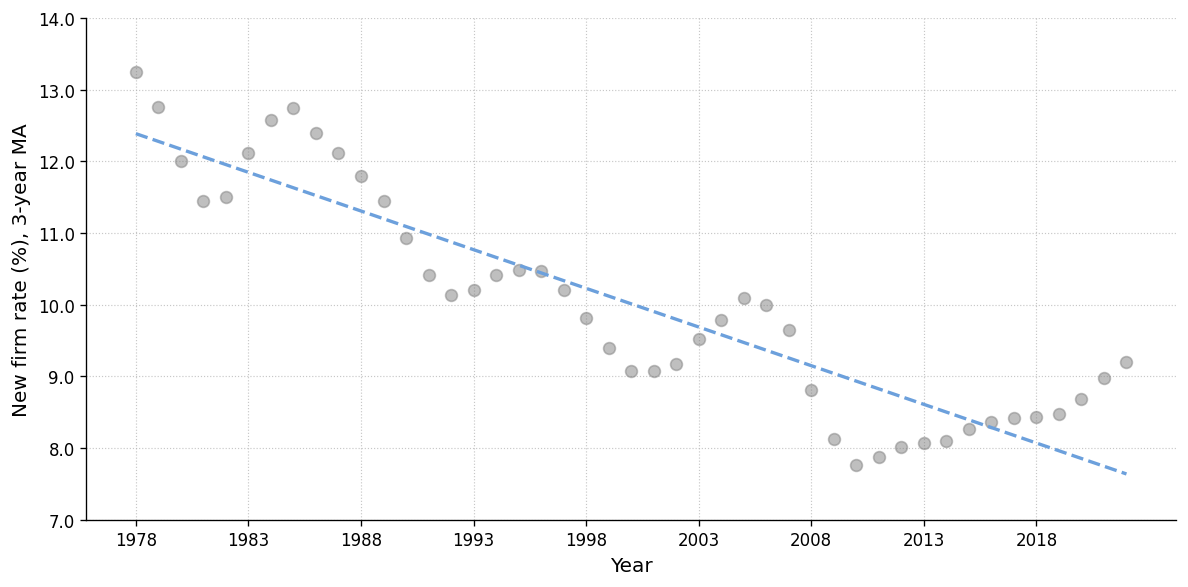

In [57]:
import numpy as np

# Compute 3-year centered moving average for new_firm_rate
new_firms['new_firm_rate_3yr_avg'] = (
    new_firms
    .sort_values('year')
    .new_firm_rate
    .rolling(window=3, min_periods=1, center=True)
    .mean()
)

# Prepare data for plotting
X = new_firms[['year']].values
y = new_firms['new_firm_rate_3yr_avg'].values

# Fit linear trend
model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

# Plot
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

# Scatter plot of 3-year MA
ax.scatter(
    new_firms['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

# Trend line
ax.plot(
    new_firms['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#6CA0DC',
)

# Dynamic y-ticks
y_min = np.floor(y.min())
y_max = np.ceil(y.max())
y_range = y_max - y_min
tick_spacing = 0.5 if y_range <= 5 else (1.0 if y_range <= 10 else 2.0)
ax.set_yticks(np.arange(y_min, y_max + tick_spacing, tick_spacing))
ax.yaxis.set_major_formatter('{x:.1f}')

# X-ticks
ax.set_xticks(range(int(new_firms['year'].min()), int(new_firms['year'].max())+1, 5))

# Spine cleanup
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Gridlines
ax.grid(which='major', linestyle=':', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

# Labels
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('New firm rate (%), 3-year MA', fontsize=12)

plt.tight_layout()
plt.show()